In [4]:
library(h2o)
h2o.init()
data<-h2o.uploadFile("../data/wholesale_customers_data.csv")

 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         1 minutes 53 seconds 
    H2O cluster version:        3.10.2.2 
    H2O cluster version age:    3 months and 5 days  
    H2O cluster name:           H2O_started_from_R_micio1970_qza861 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   1.71 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  2 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    R Version:                  R version 3.3.2 (2016-10-31) 

  |======================================================================| 100%


In [11]:
h2o.head(data)

Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
2,3,12669,9656,7561,214,2674,1338
2,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
1,3,13265,1196,4221,6404,507,1788
2,3,22615,5410,7198,3915,1777,5185
2,3,9413,8259,5126,666,1795,1451


In [12]:
h2o.describe(data)

Label,Type,Missing,Zeros,PosInf,NegInf,Min,Max,Mean,Sigma,Cardinality
Channel,enum,0,298,0,0,0,1,0.322727272727273,0.468051569479114,2
Region,enum,0,77,0,0,0,2,NA,NA,3
Fresh,int,0,0,0,0,3,112151,12000.2977272727,12647.3288650769,NA
Milk,int,0,0,0,0,55,73498,5796.26590909092,7380.37717457085,NA
Grocery,int,0,0,0,0,3,92780,7951.27727272727,9503.16282899435,NA
Frozen,int,0,0,0,0,25,60869,3071.93181818182,4854.67333259237,NA
Detergents_Paper,int,0,0,0,0,3,40827,2881.49318181818,4767.8544479042,NA
Delicassen,int,0,0,0,0,3,47943,1524.87045454545,2820.1059373694,NA


In [7]:
### Convert Numeric to Categorical ###
to_factors <- c(1,2)
for(i in to_factors) data[,i] <- h2o.asfactor(data[,i])

In [8]:
h2o.describe(data)

Label,Type,Missing,Zeros,PosInf,NegInf,Min,Max,Mean,Sigma,Cardinality
Channel,enum,0,298,0,0,0,1,0.322727272727273,0.468051569479114,2
Region,enum,0,77,0,0,0,2,NA,NA,3
Fresh,int,0,0,0,0,3,112151,12000.2977272727,12647.3288650769,NA
Milk,int,0,0,0,0,55,73498,5796.26590909092,7380.37717457085,NA
Grocery,int,0,0,0,0,3,92780,7951.27727272727,9503.16282899435,NA
Frozen,int,0,0,0,0,25,60869,3071.93181818182,4854.67333259237,NA
Detergents_Paper,int,0,0,0,0,3,40827,2881.49318181818,4767.8544479042,NA
Delicassen,int,0,0,0,0,3,47943,1524.87045454545,2820.1059373694,NA


In [13]:
h2o.summary(data)

Warning message in h2o.summary(data):
“Approximated quantiles computed! If you are interested in exact quantiles, please pass the `exact_quantiles=TRUE` parameter.”

 Channel Region Fresh            Milk            Grocery        
 1:298   3:316  Min.   :     3   Min.   :   55   Min.   :    3  
 2:142   1: 77  1st Qu.:  3031   1st Qu.: 1524   1st Qu.: 2137  
         2: 47  Median :  8470   Median : 3580   Median : 4735  
                Mean   : 12000   Mean   : 5796   Mean   : 7951  
                3rd Qu.: 16825   3rd Qu.: 7179   3rd Qu.:10603  
                Max.   :112151   Max.   :73498   Max.   :92780  
 Frozen            Detergents_Paper  Delicassen       
 Min.   :   25.0   Min.   :    3.0   Min.   :    3.0  
 1st Qu.:  694.3   1st Qu.:  247.9   1st Qu.:  386.5  
 Median : 1485.3   Median :  799.1   Median :  961.8  
 Mean   : 3071.9   Mean   : 2881.5   Mean   : 1524.9  
 3rd Qu.: 3508.4   3rd Qu.: 3891.6   3rd Qu.: 1776.8  
 Max.   :60869.0   Max.   :40827.0   Max.   :47943.0  

In [15]:
h2o.str(data)

Class 'H2OFrame' <environment: 0x2fd8540> 
 - attr(*, "op")= chr ":="
 - attr(*, "eval")= logi TRUE
 - attr(*, "id")= chr "RTMP_sid_b01a_6"
 - attr(*, "nrow")= int 440
 - attr(*, "ncol")= int 8
 - attr(*, "types")=List of 8
  ..$ : chr "enum"
  ..$ : chr "enum"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
  ..$ : chr "int"
 - attr(*, "data")='data.frame':	100 obs. of  8 variables:
  ..$ Channel         : Factor w/ 2 levels "1","2": 2 2 2 1 2 2 2 2 1 2 ...
  ..$ Region          : Factor w/ 3 levels "1","2","3": 3 3 3 3 3 3 3 3 3 3 ...
  ..$ Fresh           : num  12669 7057 6353 13265 22615 ...
  ..$ Milk            : num  9656 9810 8808 1196 5410 ...
  ..$ Grocery         : num  7561 9568 7684 4221 7198 ...
  ..$ Frozen          : num  214 1762 2405 6404 3915 ...
  ..$ Detergents_Paper: num  2674 3293 3516 507 1777 ...
  ..$ Delicassen      : num  1338 1776 7844 1788 5185 ...


In [16]:
h2o.group_by(data, by="Channel",nrow("Channel"))

  Channel nrow_Channel
1       1          298
2       2          142

[2 rows x 2 columns] 

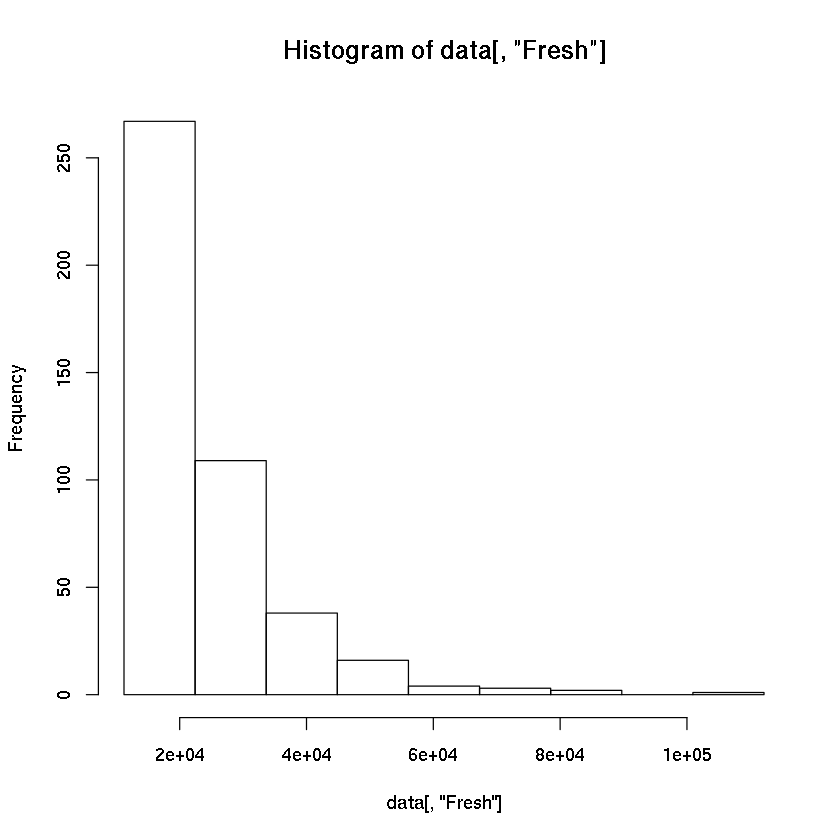

In [17]:
h2o.hist(data[,"Fresh"])
#h2o.hist(data[,14])

In [18]:
target <- "Channel"

In [19]:
print(target)

[1] "Channel"


In [20]:
a<-colnames(data)
features <- a[2:7]
print(features)

[1] "Region"           "Fresh"            "Milk"             "Grocery"         
[5] "Frozen"           "Detergents_Paper"


In [21]:
set.seed(102) # Set Seed so that same sample can be reproduced in future also
# Now Selecting 75% of data as sample from total 'n' rows of the data  

# Split dataset giving the training dataset 75% of the data
data.split <- h2o.splitFrame(data=data, ratios=0.75)

# Create a training set from the 1st dataset in the split
data.train <- data.split[[1]]

# Create a testing set from the 2nd dataset in the split
data.test <- data.split[[2]]


In [22]:
nrow(data.train)

[1] 337

In [23]:
glm_model1 <- h2o.glm(x = features, 
                      y = target, 
                      training_frame = data.train,
                      model_id = "glm_model1",
                      family = "binomial")

  |======================================================================| 100%


In [24]:
print(summary(glm_model1))

Model Details:

H2OBinomialModel: glm
Model Key:  glm_model1 
GLM Model: summary
    family  link                               regularization
1 binomial logit Elastic Net (alpha = 0.5, lambda = 5.68E-4 )
  number_of_predictors_total number_of_active_predictors number_of_iterations
1                          8                           7                    6
   training_frame
1 RTMP_sid_b01a_9

H2OBinomialMetrics: glm
** Reported on training data. **

MSE:  0.06445815
RMSE:  0.2538861
LogLoss:  0.2275041
Mean Per-Class Error:  0.08861076
AUC:  0.9539424
Gini:  0.9078849
R^2:  0.6945996
Null Deviance:  413.2362
Residual Deviance:  153.3378
AIC:  169.3378

Confusion Matrix for F1-optimal threshold:
         1   2    Error     Rate
1      221  14 0.059574  =14/235
2       12  90 0.117647  =12/102
Totals 233 104 0.077151  =26/337

Maximum Metrics: Maximum metrics at their respective thresholds
                        metric threshold    value idx
1                       max f1  0.425323 0.

In [25]:
perf_obj <- h2o.performance(glm_model1, newdata = data.test)

In [26]:
print(perf_obj)

H2OBinomialMetrics: glm

MSE:  0.06068657
RMSE:  0.2463464
LogLoss:  0.2278505
Mean Per-Class Error:  0.04880952
AUC:  0.9638889
Gini:  0.9277778
R^2:  0.7445144
Null Deviance:  141.0315
Residual Deviance:  46.9372
AIC:  62.9372

Confusion Matrix for F1-optimal threshold:
        1  2    Error    Rate
1      60  3 0.047619   =3/63
2       2 38 0.050000   =2/40
Totals 62 41 0.048544  =5/103

Maximum Metrics: Maximum metrics at their respective thresholds
                        metric threshold    value idx
1                       max f1  0.299992 0.938272  40
2                       max f2  0.299992 0.945274  40
3                 max f0point5  0.575322 0.937500  33
4                 max accuracy  0.299992 0.951456  40
5                max precision  1.000000 1.000000   0
6                   max recall  0.012771 1.000000  94
7              max specificity  1.000000 1.000000   0
8             max absolute_mcc  0.299992 0.898468  40
9   max min_per_class_accuracy  0.299992 0.950000  40
10

In [32]:
h2o.accuracy(perf_obj,0.946986888684036)

[[1]]
[1] 0.8058252

In [30]:
pred_channel <- h2o.predict(glm_model1,data.test)
pred_channel

  |======================================================================| 100%


  predict         p1         p2
1       2 0.14923647 0.85076353
2       2 0.02989288 0.97010712
3       1 0.91091737 0.08908263
4       1 0.93788012 0.06211988
5       1 0.97290165 0.02709835
6       1 0.95943533 0.04056467

[103 rows x 3 columns] 